# data prepare

In [3]:
import pandas as pd
from PIL import Image
import torch

In [4]:
data = pd.read_csv('./data/list_attr_celeba.txt', sep="\s*", header=0)
partition = pd.read_csv('./data/list_eval_partition.txt', sep="\s*", header=None)

/home/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/home/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:2379: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:2381: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [5]:
partition.columns = ["filename", "file_cate"]
data = data.merge(partition, on = "filename", how = "left")

In [6]:
print(data.columns)

Index(['filename', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young', 'file_cate'],
      dtype='object')


In [7]:
data.to_csv("./data/list_merge_attr_celeba.csv", index = False)

In [8]:
def pil_loader(path):
    # open path as file to avoid ResourceWarning (https://github.com/python-pillow/Pillow/issues/835)
    with open(path, 'rb') as f:
        img = Image.open(f)
        return img.convert('RGB')#将图片转换为RGB格式。

In [9]:
picture_data1=pil_loader(r'/home/tongqing.li/qianbao/picture_score/data/img_align_celeba/000001.jpg')

In [10]:
import numpy as np
np.array(picture_data1).shape

(218, 178, 3)

In [11]:
from torch.utils.data import Dataset, DataLoader 
import os
class myDataset(Dataset):
    def __init__(self, loadPath, transform, data_category = 0): #r'home/tongqing.li/lesson/pytorch/MNIST_data/MNIST/processed/training.pt'
        super(myDataset, self).__init__()
        self.data = pd.read_csv(loadPath)
        self.data = self.data[self.data["file_cate"] == data_category]
        self.transform = transform
        
    def __getitem__(self, index):
        #Heavy_Makeup，Male，Wearing_Earrings，Wearing_Necklace，Wearing_Necktie
        picture = pil_loader(r'/home/tongqing.li/qianbao/picture_score/data/img_align_celeba/' + self.data.iloc[index]["filename"])
        label = self.data.iloc[index][["Wearing_Earrings", "Wearing_Necklace"]]
        for i in ["Wearing_Earrings", "Wearing_Necklace"]:
            if (label.loc[i] == -1):
                label.loc[i] = 0
        label = torch.tensor(label)
        picture = self.transform(picture)
        return (picture, label.long())
    
    def __len__(self):
        return self.data.shape[0]

In [12]:
from torchvision import datasets, transforms
transform = transforms.Compose([transforms.Resize((224,224)), transforms.CenterCrop(224),transforms.ToTensor(),transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

train_face_dataset = myDataset("./data/list_merge_attr_celeba.csv", data_category = 0, transform = transform)
valid_face_dataset = myDataset("./data/list_merge_attr_celeba.csv", data_category = 1, transform = transform)
test_face_dataset = myDataset("./data/list_merge_attr_celeba.csv", data_category = 2, transform = transform)

In [43]:
for i in range(train_face_dataset.__len__()):
    print(train_face_dataset.__getitem__(i)[1], i)

tensor([1, 0]) 0
tensor([0, 0]) 1
tensor([0, 0]) 2
tensor([1, 1]) 3
tensor([0, 0]) 4
tensor([1, 0]) 5
tensor([0, 0]) 6
tensor([0, 0]) 7
tensor([1, 0]) 8
tensor([0, 0]) 9
tensor([0, 0]) 10
tensor([0, 0]) 11
tensor([0, 0]) 12
tensor([0, 1]) 13
tensor([0, 0]) 14
tensor([0, 0]) 15
tensor([0, 0]) 16
tensor([1, 1]) 17
tensor([0, 1]) 18
tensor([0, 0]) 19
tensor([0, 0]) 20
tensor([0, 1]) 21
tensor([0, 0]) 22
tensor([1, 1]) 23
tensor([0, 0]) 24
tensor([0, 0]) 25
tensor([0, 0]) 26
tensor([0, 0]) 27
tensor([1, 0]) 28
tensor([0, 0]) 29
tensor([0, 0]) 30
tensor([0, 0]) 31
tensor([0, 0]) 32
tensor([0, 0]) 33
tensor([0, 0]) 34
tensor([0, 0]) 35
tensor([0, 0]) 36
tensor([0, 0]) 37
tensor([1, 0]) 38
tensor([1, 0]) 39
tensor([0, 0]) 40
tensor([1, 0]) 41
tensor([1, 0]) 42
tensor([0, 1]) 43
tensor([1, 0]) 44
tensor([0, 0]) 45
tensor([1, 0]) 46
tensor([0, 0]) 47
tensor([0, 0]) 48
tensor([0, 0]) 49
tensor([0, 0]) 50
tensor([0, 0]) 51
tensor([0, 0]) 52
tensor([0, 1]) 53
tensor([0, 0]) 54
tensor([0, 0]) 55
te

tensor([0, 0]) 446
tensor([1, 0]) 447
tensor([0, 0]) 448
tensor([0, 0]) 449
tensor([1, 0]) 450
tensor([0, 0]) 451
tensor([0, 0]) 452
tensor([1, 0]) 453
tensor([0, 0]) 454
tensor([0, 1]) 455
tensor([0, 0]) 456
tensor([0, 0]) 457
tensor([0, 0]) 458
tensor([0, 0]) 459
tensor([0, 1]) 460
tensor([1, 1]) 461
tensor([0, 0]) 462
tensor([1, 0]) 463
tensor([0, 0]) 464
tensor([1, 0]) 465
tensor([1, 0]) 466
tensor([0, 0]) 467
tensor([0, 0]) 468
tensor([0, 0]) 469
tensor([0, 1]) 470
tensor([0, 0]) 471
tensor([0, 0]) 472
tensor([0, 0]) 473
tensor([0, 1]) 474
tensor([0, 0]) 475
tensor([0, 0]) 476
tensor([0, 0]) 477
tensor([0, 0]) 478
tensor([0, 0]) 479
tensor([0, 0]) 480
tensor([0, 1]) 481
tensor([0, 0]) 482
tensor([0, 1]) 483
tensor([0, 0]) 484
tensor([0, 0]) 485
tensor([1, 0]) 486
tensor([0, 1]) 487
tensor([0, 0]) 488
tensor([0, 0]) 489
tensor([0, 1]) 490
tensor([1, 0]) 491
tensor([0, 0]) 492
tensor([1, 0]) 493
tensor([0, 0]) 494
tensor([0, 0]) 495
tensor([0, 0]) 496
tensor([0, 0]) 497
tensor([0, 1

KeyboardInterrupt: 

In [ ]:
train_face_dataset.__getitem__(23)[0]

In [13]:
train_face_dataset.__getitem__(0)[1].shape

torch.Size([2])

In [14]:
batch_size = 64
num_workers = 4

In [15]:
train_face_loader = DataLoader(train_face_dataset, batch_size=batch_size, shuffle=True,num_workers=num_workers, pin_memory=True)
valid_face_loader = DataLoader(valid_face_dataset, batch_size=batch_size, shuffle=True,num_workers=num_workers, pin_memory=True)
test_face_loader = DataLoader(test_face_dataset, batch_size=batch_size, shuffle=True,num_workers=num_workers, pin_memory=True)

In [16]:
import torch.nn as nn
import torch.utils.model_zoo as model_zoo


__all__ = ['ResNet', 'resnet50']


model_urls = {
    'resnet18': 'https://download.pytorch.org/models/resnet18-5c106cde.pth',
    'resnet34': 'https://download.pytorch.org/models/resnet34-333f7ec4.pth',
    'resnet50': 'https://download.pytorch.org/models/resnet50-19c8e357.pth',
    'resnet101': 'https://download.pytorch.org/models/resnet101-5d3b4d8f.pth',
    'resnet152': 'https://download.pytorch.org/models/resnet152-b121ed2d.pth',
}


def conv3x3(in_planes, out_planes, stride=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)


def conv1x1(in_planes, out_planes, stride=1):
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        self.conv1 = conv1x1(inplanes, planes)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = conv3x3(planes, planes, stride)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = conv1x1(planes, planes * self.expansion)
        self.bn3 = nn.BatchNorm2d(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class fc_block(nn.Module):
    def __init__(self, inplanes, planes, drop_rate=0.15):
        super(fc_block, self).__init__()
        self.fc = nn.Linear(inplanes, planes)
        self.bn = nn.BatchNorm1d(planes)
        if drop_rate > 0:
            self.dropout = nn.Dropout(drop_rate)
        self.relu = nn.ReLU(inplace=True)
        self.drop_rate = drop_rate

    def forward(self, x):
        x = self.fc(x)
        x = self.bn(x)
        if self.drop_rate > 0:
            x = self.dropout(x)
        x = self.relu(x)
        return x


class ResNet(nn.Module):

    def __init__(self, block, layers, num_attributes=2, zero_init_residual=False):
        super(ResNet, self).__init__()
        self.inplanes = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3,
                               bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.stem = fc_block(512 * block.expansion, 512)
        for i in range(num_attributes):
            setattr(self, 'classifier' + str(i).zfill(2), nn.Sequential(fc_block(512, 256), nn.Linear(256, 2)))
        self.num_attributes = num_attributes

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # Zero-initialize the last BN in each residual branch,
        # so that the residual branch starts with zeros, and each residual block behaves like an identity.
        # This improves the model by 0.2~0.3% according to https://arxiv.org/abs/1706.02677
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)
                elif isinstance(m, BasicBlock):
                    nn.init.constant_(m.bn2.weight, 0)

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.stem(x)

        y = []
        for i in range(self.num_attributes):
            classifier = getattr(self, 'classifier' + str(i).zfill(2))
            y.append(classifier(x))

        return y


def resnet50(pretrained=True, **kwargs):
    """Constructs a ResNet-50 model.

    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = ResNet(Bottleneck, [3, 4, 6, 3], **kwargs)
    if pretrained:
        init_pretrained_weights(model, model_urls['resnet50'])
    return model


def init_pretrained_weights(model, model_url):
    """
    Initialize model with pretrained weights.
    Layers that don't match with pretrained layers in name or size are kept unchanged.
    """
    pretrain_dict = model_zoo.load_url(model_url)
    model_dict = model.state_dict()
    pretrain_dict = {k: v for k, v in pretrain_dict.items() if k in model_dict and model_dict[k].size() == v.size()}
    model_dict.update(pretrain_dict)
    model.load_state_dict(model_dict)
    print("Initialized model with pretrained weights from {}".format(model_url))



In [19]:
from torch import nn, optim
import torch.nn.functional as F

device = 'cuda' if torch.cuda.is_available() else 'cpu'
#model = resnet50()

model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
epochs = 100
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in train_face_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        log_ps = model(images)
        loss = []
        for i, log_ps_data in enumerate(log_ps):
            loss.append(criterion(log_ps_data, labels[:,i]))
        #print(loss)
        sum(loss).backward()
        optimizer.step()
        
        running_loss += sum(loss).item()
    
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()#这里就是关闭dropout了。
            accuracy = [0, 0, 0, 0, 0, 0]
            for images, labels in valid_face_loader:
                images, labels = images.to(device), labels.to(device)
                log_ps = model(images)
                test_loss = []
                
                for i, log_ps_data in enumerate(log_ps):
                    test_loss.append(criterion(log_ps_data, labels[:,i]))
                    top_p, top_class = log_ps_data.topk(1, dim=1)
                    equals = top_class == labels[:, i].view(*top_class.shape)
                    accuracy[i] += torch.mean(equals.type(torch.FloatTensor))
        
        model.train()
        for i in range(2):
            accuracy[i] = accuracy[i] / len(valid_face_loader)
        print(test_loss)
        #model.load_state_dict(torch.load(filepath))
        torch.save(model.state_dict(), r'/home/tongqing.li/qianbao/deep_learning/neural_network_in_pytorch/deep_model/model' + str(e + 1))
        train_losses.append(running_loss/len(train_face_loader))
        test_losses.append(sum(test_loss)/len(valid_face_loader))
        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Test Loss: {:.4f}.. ".format(test_losses[-1]),
              "Test Accuracy: {:.4f}".format(sum(accuracy)/2))
        print(accuracy)

[tensor(0.1425, device='cuda:0'), tensor(0.2614, device='cuda:0')]
Epoch: 1/100..  Training Loss: 0.386..  Test Loss: 0.0013..  Test Accuracy: 0.9100
[tensor(0.9218), tensor(0.8983), 0, 0, 0, 0]
[tensor(0.0856, device='cuda:0'), tensor(0.2913, device='cuda:0')]
Epoch: 2/100..  Training Loss: 0.332..  Test Loss: 0.0012..  Test Accuracy: 0.8950
[tensor(0.9175), tensor(0.8724), 0, 0, 0, 0]
[tensor(0.3499, device='cuda:0'), tensor(0.2879, device='cuda:0')]
Epoch: 3/100..  Training Loss: 0.271..  Test Loss: 0.0021..  Test Accuracy: 0.8928
[tensor(0.9149), tensor(0.8708), 0, 0, 0, 0]
[tensor(0.1150, device='cuda:0'), tensor(0.4697, device='cuda:0')]
Epoch: 4/100..  Training Loss: 0.215..  Test Loss: 0.0019..  Test Accuracy: 0.8965
[tensor(0.9071), tensor(0.8859), 0, 0, 0, 0]
[tensor(0.3737, device='cuda:0'), tensor(0.3826, device='cuda:0')]
Epoch: 5/100..  Training Loss: 0.173..  Test Loss: 0.0024..  Test Accuracy: 0.8951
[tensor(0.9111), tensor(0.8790), 0, 0, 0, 0]
[tensor(0.2639, device='c

KeyboardInterrupt: 

In [ ]:
#Epoch: 1/100..  Training Loss: 0.503..  Test Loss: 0.0012..  Test Accuracy: 0.3036
#[tensor(0.9228), tensor(0.8986), 0, 0, 0, 0]
#Epoch: 2/100..  Training Loss: 0.431..  Test Loss: 0.0013..  Test Accuracy: 0.3026
#[tensor(0.9198), tensor(0.8956), 0, 0, 0, 0]

In [20]:
model.load_state_dict(torch.load(r'/home/tongqing.li/qianbao/deep_learning/neural_network_in_pytorch/deep_model/model1'))

<All keys matched successfully>

In [21]:
        with torch.no_grad():    
            model.eval()#这里就是关闭dropout了。
            accuracy = [0, 0, 0, 0, 0, 0]
            for images, labels in test_face_loader:
                images, labels = images.to(device), labels.to(device)
                log_ps = model(images)
                test_loss = []
                x = 0
                for i, log_ps_data in enumerate(log_ps):
                    test_loss.append(criterion(log_ps_data, labels[:,i]))
                    top_p, top_class = log_ps_data.topk(1, dim=1)
                    equals = top_class == labels[:, i].view(*top_class.shape)
                    accuracy[i] += torch.mean(equals.type(torch.FloatTensor))
                #print(accuracy)
            model.train()

In [23]:
tot = 0
for i in range(2):
    print(accuracy[i]/len(test_face_loader))
    tot = tot + accuracy[i]/len(test_face_loader)
print(tot/2)
#"Eyeglasses", "Heavy_Makeup", "Male", "Wearing_Earrings", "Wearing_Necklace", "Wearing_Necktie"

tensor(0.9049)
tensor(0.8790)
tensor(0.8919)


In [25]:
test_output = []
y_true = []
#test_output.to(device)
for i in range(2):
    test_output.append(torch.Tensor())
    y_true.append(torch.Tensor())
with torch.no_grad():    
    model.eval()#这里就是关闭dropout了。
    accuracy = [0, 0, 0, 0, 0, 0]
    for images, labels in test_face_loader:
        images, labels = images.to(device), labels.to(device)
        log_ps = model(images)
        for i in range(2):
            #print(labels[:, :i+1].shape)
            y_true[i] = torch.cat((y_true[i].to(device), labels[:, i:i+1].type(torch.FloatTensor).to(device)))
            #print(type(y_true[i]))
        for i, log_ps_data in enumerate(log_ps):
            test_output[i] = torch.cat((test_output[i].to(device), log_ps_data))
        #print(test_output[0].shape)

In [26]:
softmax = nn.Softmax()
test_output[0].shape
for i in range(len(test_output)):
    for j in range(len(test_output[i])):
        #print(test_output[i][j].shape)
        test_output[i][j] = softmax(test_output[i][j])
        #print(j)
"""
for i in test_output:
    for j in i:
        #print(j)
        j = softmax(j)
        #print(j)
""" 

/home/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


'\nfor i in test_output:\n    for j in i:\n        #print(j)\n        j = softmax(j)\n        #print(j)\n'

In [67]:
print(test_output)

[tensor([[0.7307, 0.2693],
        [0.7308, 0.2692],
        [0.7309, 0.2691],
        ...,
        [0.7308, 0.2692],
        [0.7310, 0.2690],
        [0.7311, 0.2689]], device='cuda:0'), tensor([[0.7309, 0.2691],
        [0.4975, 0.5025],
        [0.7310, 0.2690],
        ...,
        [0.5694, 0.4306],
        [0.7305, 0.2695],
        [0.7311, 0.2689]], device='cuda:0'), tensor([[7.2986e-01, 2.7014e-01],
        [7.3106e-01, 2.6894e-01],
        [5.5865e-01, 4.4135e-01],
        ...,
        [9.9951e-01, 4.9428e-04],
        [8.7911e-01, 1.2089e-01],
        [1.5430e-06, 1.0000e+00]], device='cuda:0'), tensor([[9.9934e-01, 6.6040e-04],
        [9.9875e-01, 1.2512e-03],
        [9.9910e-01, 9.0365e-04],
        ...,
        [9.8918e-01, 1.0819e-02],
        [9.9318e-01, 6.8218e-03],
        [9.9979e-01, 2.1171e-04]], device='cuda:0'), tensor([[7.7495e-01, 2.2505e-01],
        [9.0173e-01, 9.8271e-02],
        [9.9839e-01, 1.6147e-03],
        ...,
        [9.3638e-01, 6.3620e-02],
  

In [27]:
from sklearn.metrics import precision_recall_curve
for i in range(2):
    y_true[i] = y_true[i].squeeze(1).cpu().detach().numpy()
    test_output[i] = test_output[i][:, 1:2].squeeze(1).cpu().detach().numpy()

In [28]:
print(test_output[0].shape, y_true[i].shape)

(19962,) (19962,)


In [29]:
pr = []
for i, output in enumerate(test_output):
    pr.append(precision_recall_curve(y_true[i], output))

In [31]:
index = 0
for i in pr[1][0]:
    print(i, index)
    index = index + 1
print(index)

0.13883705683594735 0
0.13879362517651805 1
0.13880062540979474 2
0.13880762634923838 3
0.13881462799495586 4
0.13882163034705408 5
0.13882863340563992 6
0.13883563717082031 7
0.13884264164270219 8
0.13884964682139253 9
0.13885665270699835 10
0.1388636592996266 11
0.13887066659938438 12
0.13887767460637868 13
0.13888468332071663 14
0.1388916927425053 15
0.13889870287185183 16
0.13890571370886332 17
0.13891272525364695 18
0.13891973750630995 19
0.13892675046695946 20
0.13893376413570274 21
0.13894077851264705 22
0.13894779359789963 23
0.1389548093915678 24
0.13896182589375883 25
0.1389688431045801 26
0.13897586102413897 27
0.1389828796525428 28
0.138989898989899 29
0.13899691903631498 30
0.13900393979189818 31
0.13901096125675608 32
0.13901798343099617 33
0.13902500631472595 34
0.13903202990805294 35
0.13903905421108473 36
0.13904607922392886 37
0.13905310494669293 38
0.1390601313794846 39
0.13906715852241144 40
0.13907418637558117 41
0.13908121493910144 42
0.13908824421307994 43
0.1390

0.14869245731575534 1320
0.14870049170584104 1321
0.14870852696422782 1322
0.14871656309105646 1323
0.1487246000864678 1324
0.1487326379506026 1325
0.14874067668360177 1326
0.14874871628560618 1327
0.14875675675675676 1328
0.14876479809719445 1329
0.14877284030706023 1330
0.14878088338649512 1331
0.14878892733564014 1332
0.1487969721546364 1333
0.14880501784362496 1334
0.148813064402747 1335
0.14882111183214364 1336
0.14882916013195607 1337
0.14883720930232558 1338
0.14884525934339338 1339
0.14885331025530074 1340
0.148861362038189 1341
0.1488694146921995 1342
0.14887746821747364 1343
0.14888552261415278 1344
0.1488935778823784 1345
0.14890163402229195 1346
0.14890969103403495 1347
0.14891774891774892 1348
0.1489258076735754 1349
0.14893386730165603 1350
0.1489419278021324 1351
0.14894998917514612 1352
0.14895805142083898 1353
0.1489661145393526 1354
0.14897417853082878 1355
0.14898224339540928 1356
0.14899030913323588 1357
0.14899837574445046 1358
0.14900644322919487 1359
0.1490145115

0.15942280945757997 2570
0.1594320486815416 2571
0.15944128897646923 2572
0.15945053034254913 2573
0.15945977277996753 2574
0.15946901628891078 2575
0.1594782608695652 2576
0.1594875065221172 2577
0.15949675324675325 2578
0.15950600104365978 2579
0.15951524991302332 2580
0.15952449985503045 2581
0.1595337508698678 2582
0.15954300295772197 2583
0.1595522561187797 2584
0.15956151035322777 2585
0.1595707656612529 2586
0.15958002204304195 2587
0.1595312681285532 2588
0.1595405232929164 2589
0.15954977953121374 2590
0.15955903684363215 2591
0.1595682952303586 2592
0.1595775546915801 2593
0.15958681522748375 2594
0.15959607683825663 2595
0.1596053395240859 2596
0.15961460328515875 2597
0.1596238681216624 2598
0.15963313403378418 2599
0.15964240102171137 2600
0.15965166908563136 2601
0.15966093822573155 2602
0.1596702084421994 2603
0.1596794797352224 2604
0.1596887521049881 2605
0.15969802555168408 2606
0.159707300075498 2607
0.15971657567661748 2608
0.1597258523552303 2609
0.1597351301115241

0.17162314132200424 3819
0.17163386441736958 3820
0.1716445888527868 3821
0.17165531462850717 3822
0.1716660417447819 3823
0.1716767702018624 3824
0.1716875 3825
0.1716982311394462 3826
0.17170896362045257 3827
0.17171969744327062 3828
0.17173043260815204 3829
0.17174116911534854 3830
0.17175190696511192 3831
0.171762646157694 3832
0.17177338669334669 3833
0.17178412857232192 3834
0.1717948717948718 3835
0.17180561636124836 3836
0.17181636227170377 3837
0.17182710952649027 3838
0.17183785812586014 3839
0.1718486080700657 3840
0.17185935935935936 3841
0.17187011199399363 3842
0.171880865974221 3843
0.1718916213002941 3844
0.17190237797246558 3845
0.17191313599098818 3846
0.17192389535611466 3847
0.17193465606809788 3848
0.17194541812719077 3849
0.17195618153364634 3850
0.17196694628771755 3851
0.17197771238965753 3852
0.17198847983971952 3853
0.17199924863815666 3854
0.1720100187852223 3855
0.17202079028116976 3856
0.1720315631262525 3857
0.172042337320724 3858
0.1720531128648378 3859
0

0.188542671997794 5319
0.1885556704584626 5320
0.18856867071152786 5321
0.18858167275736054 5322
0.18859467659633153 5323
0.1886076822288118 5324
0.18862068965517242 5325
0.18863369887578454 5326
0.18864670989101945 5327
0.18865972270124853 5328
0.18867273730684328 5329
0.18868575370817522 5330
0.18869877190561613 5331
0.1887117918995377 5332
0.1887248136903119 5333
0.18873783727831067 5334
0.18875086266390614 5335
0.1887638898474705 5336
0.18877691882937603 5337
0.18878994960999518 5338
0.1888029821897004 5339
0.18881601656886435 5340
0.18882905274785972 5341
0.18884209072705932 5342
0.18885513050683608 5343
0.188868172087563 5344
0.18888121546961326 5345
0.18889426065336004 5346
0.18890730763917668 5347
0.18892035642743663 5348
0.1889334070185134 5349
0.18894645941278065 5350
0.18895951361061214 5351
0.18897256961238168 5352
0.18898562741846323 5353
0.18899868702923087 5354
0.18901174844505875 5355
0.1890248116663211 5356
0.1890378766933923 5357
0.18905094352664686 5358
0.18906401216

0.21210695522622128 7069
0.21212358845671267 7070
0.21214022429613363 7071
0.21215686274509804 7072
0.21217350380421993 7073
0.21219014747411358 7074
0.21220679375539342 7075
0.2122234426486741 7076
0.21224009415457043 7077
0.21225674827369742 7078
0.21227340500667033 7079
0.21229006435410452 7080
0.21230672631661565 7081
0.21232339089481947 7082
0.21234005808933198 7083
0.21235672790076934 7084
0.21237340032974797 7085
0.21239007537688442 7086
0.21240675304279544 7087
0.21242343332809802 7088
0.21244011623340925 7089
0.21245680175934653 7090
0.21247348990652737 7091
0.21249018067556952 7092
0.2125068740670909 7093
0.2125235700817096 7094
0.212540268720044 7095
0.21255696998271256 7096
0.212573673870334 7097
0.2125903803835272 7098
0.21260708952291127 7099
0.2126238012891055 7100
0.21264051568272935 7101
0.2126572327044025 7102
0.21267395235474487 7103
0.21261204591916968 7104
0.21262876464574978 7105
0.21264548600188737 7106
0.2126622099882029 7107
0.21267893660531698 7108
0.212695665

0.23289473684210527 8421
0.23291516799719272 8422
0.23293560273732233 8423
0.23295604106343776 8424
0.232976482976483 8425
0.23299692847740236 8426
0.2330173775671406 8427
0.23303783024664268 8428
0.23305828651685392 8429
0.23307874637872003 8430
0.233099209833187 8431
0.23311967688120117 8432
0.23314014752370918 8433
0.23316062176165803 8434
0.2331810995959951 8435
0.233201581027668 8436
0.23322206605762474 8437
0.23324255468681368 8438
0.23326304691618344 8439
0.23328354274668306 8440
0.23330404217926187 8441
0.2333245452148695 8442
0.23334505185445598 8443
0.2333655620989716 8444
0.23338607594936708 8445
0.2334065934065934 8446
0.2334271144716019 8447
0.23344763914534425 8448
0.2334681674287724 8449
0.2334886993228388 8450
0.23350923482849603 8451
0.23352977394669716 8452
0.2335503166783955 8453
0.23357086302454474 8454
0.2335914129860989 8455
0.2336119665640123 8456
0.2336325237592397 8457
0.23365308457273606 8458
0.23367364900545678 8459
0.23369421705835755 8460
0.2337147887323943

0.2633035988926484 10068
0.26333059885151766 10069
0.263357604348272 10070
0.2633846153846154 10071
0.26341163196225253 10072
0.2634386540828888 10073
0.2634656817482302 10074
0.26339010876256924 10075
0.2634171369933299 10076
0.26344417077175697 10077
0.26347121009955865 10078
0.26349825497844387 10079
0.26352530541012215 10080
0.2635523613963039 10081
0.26357942293870007 10082
0.26360649003902237 10083
0.26363356269898325 10084
0.2636606409202958 10085
0.26368772470467383 10086
0.2637148140538319 10087
0.26374190896948524 10088
0.2637690094533498 10089
0.2637961155071421 10090
0.26382322713257966 10091
0.2638503443313804 10092
0.26387746710526316 10093
0.26390459545594736 10094
0.2639317293851532 10095
0.2639588688946015 10096
0.263986013986014 10097
0.2640131646611128 10098
0.26404032092162105 10099
0.2640674827692624 10100
0.26409465020576134 10101
0.2641218232328429 10102
0.26414900185223295 10103
0.2641761860656581 10104
0.2642033758748456 10105
0.26423057128152344 10106
0.264257

0.3017122859642545 11818
0.30175 11819
0.3017877234654332 11820
0.301825456364091 11821
0.30186319869951234 11822
0.30190095047523763 11823
0.30193871169480924 11824
0.3019764823617713 11825
0.3020142624796697 11826
0.30205205205205204 11827
0.3020898510824678 11828
0.3021276595744681 11829
0.30216547753160594 11830
0.30220330495743614 11831
0.3022411418555152 11832
0.30215376909591785 11833
0.3021916092673763 11834
0.30222945891783565 11835
0.30226731805085805 11836
0.3023051866700075 11837
0.30234306477884976 11838
0.30238095238095236 11839
0.3024188494798847 11840
0.30245675607921785 11841
0.30249467218252474 11842
0.30253259779338015 11843
0.3025705329153605 11844
0.3026084775520441 11845
0.30264643170701117 11846
0.30268439538384345 11847
0.3027223685861247 11848
0.3027603513174404 11849
0.30279834358137786 11850
0.3028363453815261 11851
0.3028743567214761 11852
0.30278684408737133 11853
0.30282485875706217 11854
0.3028628829733802 11855
0.30290091673992214 11856
0.302813363476513

0.3479513444302177 13568
0.3480070433808228 13569
0.34806276016650656 13570
0.3481184947958367 13571
0.34801409352978857 13572
0.34806983821880505 13573
0.3481256007689843 13574
0.348181381188912 13575
0.34823717948717947 13576
0.3482929956723834 13577
0.348348829753126 13578
0.3484046817380151 13579
0.34846055163566386 13580
0.34851643945469124 13581
0.3484119345524543 13582
0.348467832504412 13583
0.3485237483953787 13584
0.34857968223399133 13585
0.34863563402889247 13586
0.34869160378873015 13587
0.348747591522158 13588
0.3488035972378352 13589
0.3488596209444266 13590
0.3489156626506024 13591
0.34897172236503854 13592
0.34902780009641654 13593
0.3490838958534233 13594
0.34914000964475167 13595
0.34919614147909966 13596
0.3492522913651713 13597
0.34930845931167576 13598
0.3493646453273283 13599
0.34942084942084944 13600
0.3494770716009654 13601
0.3495333118764081 13602
0.349589570255915 13603
0.34964584674822924 13604
0.3497021413620995 13605
0.3497584541062802 13606
0.349814784989

0.41347864768683273 15318
0.4135706340378198 15319
0.4136626613262127 15320
0.41375472957934567 15321
0.41362422083704364 15322
0.4137163215319528 15323
0.41380846325167037 15324
0.4136778792604143 15325
0.4137700534759358 15326
0.41386226877646537 15327
0.4139545251894784 15328
0.4140468227424749 15329
0.41413916146297947 15330
0.4142315413785412 15331
0.4141008478357876 15332
0.4141932604329391 15333
0.4142857142857143 15334
0.4143782094217459 15335
0.41447074586869137 15336
0.41456332365423276 15337
0.4144325290437891 15338
0.4145251396648045 15339
0.41439427805096113 15340
0.41448692152917505 15341
0.4145796064400716 15342
0.41467233281145155 15343
0.4147651006711409 15344
0.41485791004699035 15345
0.41495076096687555 15346
0.4150436534586971 15347
0.41513658755038063 15348
0.41500559910414336 15349
0.41487455197132617 15350
0.4149675106430652 15351
0.4150605109816226 15352
0.4149293880295898 15353
0.4150224215246637 15354
0.4151154967481498 15355
0.4152086137281292 15356
0.4153017

0.49387214309373967 16794
0.49403578528827036 16795
0.4938680808750414 16796
0.49403183023872677 16797
0.494195688225539 16798
0.49435965494359657 16799
0.4945237305011616 16800
0.4946879150066401 16801
0.49485220856858186 16802
0.4950166112956811 16803
0.4951811232967763 16804
0.4953457446808511 16805
0.4951779181908879 16806
0.49500998003992014 16807
0.49484193011647254 16808
0.49500665778961384 16809
0.49483849483849485 16810
0.49467021985343107 16811
0.4948350549816728 16812
0.49466666666666664 16813
0.4948316105368456 16814
0.494996664442962 16815
0.49482816149482817 16816
0.4946595460614152 16817
0.4948247078464107 16818
0.49498997995991983 16819
0.49482124958235885 16820
0.4949866310160428 16821
0.495152123035774 16822
0.4953177257525084 16823
0.4954834392773503 16824
0.4956492637215529 16825
0.49581519919651823 16826
0.4959812458137977 16827
0.49581239530988275 16828
0.4959785522788204 16829
0.496144820650352 16830
0.49631120053655264 16831
0.49647769204964776 16832
0.496644295

0.5550724637681159 17743
0.554857419043016 17744
0.554642166344294 17745
0.5549104983067247 17746
0.5551790900290416 17747
0.5554479418886199 17748
0.5557170542635659 17749
0.5559864275327193 17750
0.5562560620756547 17751
0.5565259582726831 17752
0.5563106796116505 17753
0.5565808644973288 17754
0.5563654033041788 17755
0.5566358774914925 17756
0.556420233463035 17757
0.5562043795620438 17758
0.556475170399221 17759
0.5567462250365319 17760
0.5570175438596491 17761
0.5568015602145295 17762
0.5565853658536586 17763
0.5568570034163006 17764
0.55712890625 17765
0.5574010747435271 17766
0.5576735092864125 17767
0.5579462102689486 17768
0.5577299412915852 17769
0.5580029368575624 17770
0.5582761998041136 17771
0.5585497305242528 17772
0.5588235294117647 17773
0.5586071603727317 17774
0.5588812561334642 17775
0.5591556210112911 17776
0.5594302554027505 17777
0.5592137592137593 17778
0.5594886922320551 17779
0.5597638957206099 17780
0.5595472440944882 17781
0.5593303791235844 17782
0.5596059

0.7400662251655629 19208
0.7396351575456053 19209
0.7408637873754153 19210
0.740432612312812 19211
0.74 19212
0.7395659432387313 19213
0.7391304347826086 19214
0.7386934673366834 19215
0.7399328859060402 19216
0.7411764705882353 19217
0.7424242424242424 19218
0.7419898819561551 19219
0.7432432432432432 19220
0.7428087986463621 19221
0.7440677966101695 19222
0.7436332767402377 19223
0.7431972789115646 19224
0.7444633730834753 19225
0.7440273037542662 19226
0.7435897435897436 19227
0.7448630136986302 19228
0.7461406518010292 19229
0.7457044673539519 19230
0.7452667814113597 19231
0.7448275862068966 19232
0.7443868739205527 19233
0.745674740484429 19234
0.7469670710571924 19235
0.7465277777777778 19236
0.7460869565217392 19237
0.7473867595818815 19238
0.7469458987783595 19239
0.7482517482517482 19240
0.7478108581436077 19241
0.7473684210526316 19242
0.7469244288224957 19243
0.7464788732394366 19244
0.746031746031746 19245
0.7473498233215548 19246
0.7486725663716814 19247
0.74822695035461 

In [33]:
#"Wearing_Earrings"
print(pr[0][0][15381], pr[0][1][15381])
#"Wearing_Necklace"
print(pr[1][0][19772], pr[1][1][19772])

0.9505420054200542 0.3401212121212121
0.95 0.013803123864874683


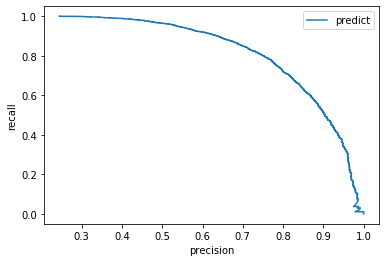

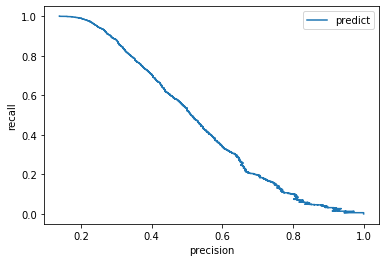

In [35]:
import matplotlib.pyplot as plt
#plt.plot(x,y,label="fact")
for i in range(2):
    plt.plot(pr[i][0],pr[i][1],label="predict")
    plt.title("")
    plt.xlabel("precision")
    plt.ylabel("recall")
    plt.legend()
    plt.savefig(fname="result.png",figsize=[10,10])
    plt.show()
    #"Eyeglasses", "Heavy_Makeup", "Male", "Wearing_Earrings", "Wearing_Necklace", "Wearing_Necktie"